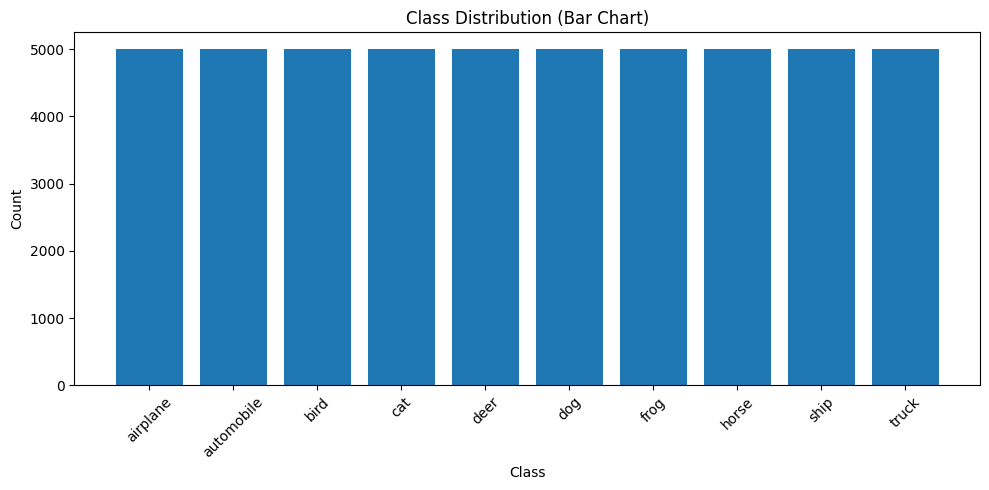

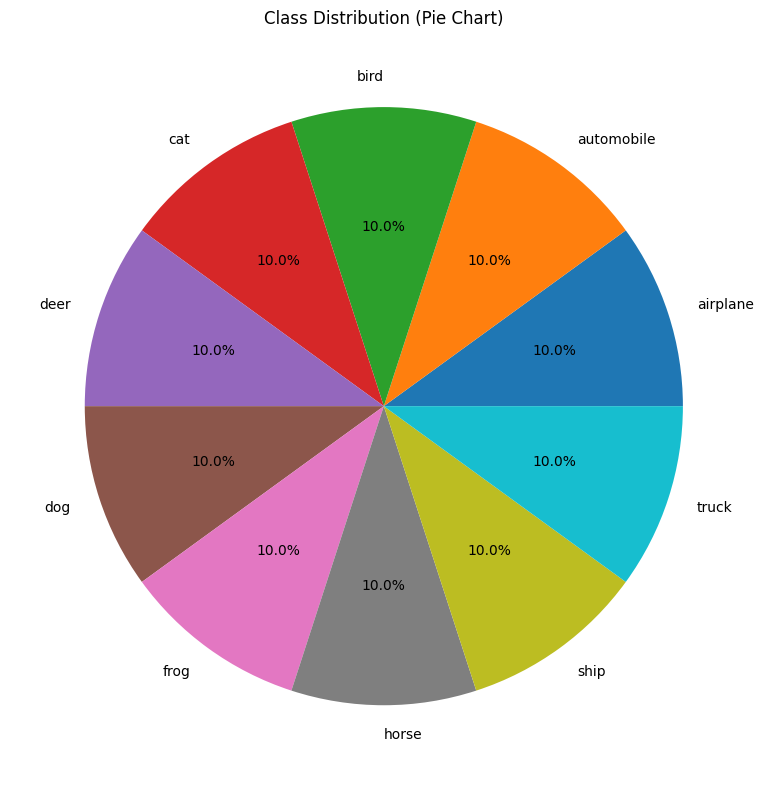

c:\Users\vsgan\OneDrive\Documents\M.Tech\Python_Projects\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


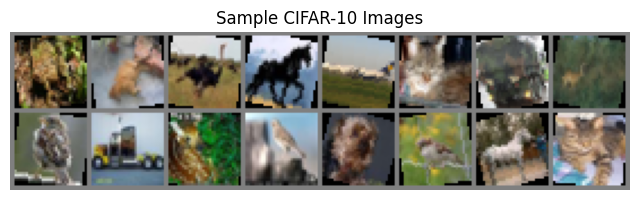

Sample labels:
frog cat bird horse airplane cat truck deer bird truck deer bird dog bird horse cat


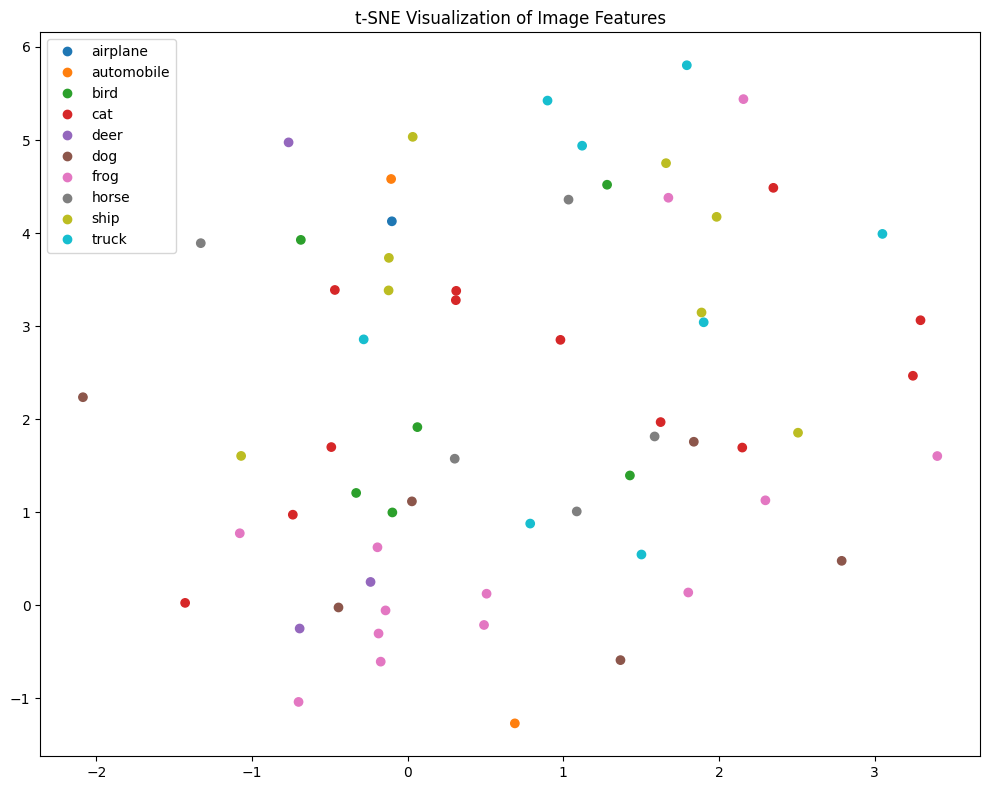

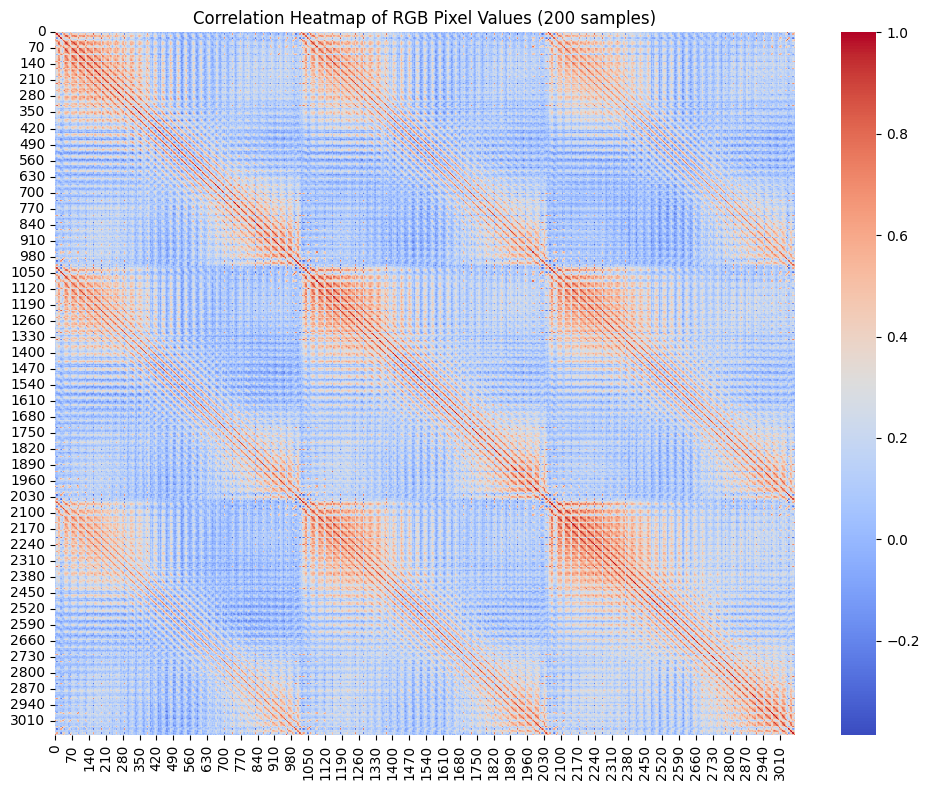

c:\Users\vsgan\OneDrive\Documents\M.Tech\Python_Projects\.venv\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch 1/22, Loss: 1.5503, Accuracy: 42.07%
Epoch 2/22, Loss: 1.2768, Accuracy: 53.39%
Epoch 3/22, Loss: 1.1662, Accuracy: 57.69%
Epoch 4/22, Loss: 1.0902, Accuracy: 60.56%
Epoch 5/22, Loss: 1.0373, Accuracy: 62.89%
Epoch 6/22, Loss: 0.9964, Accuracy: 64.33%
Epoch 7/22, Loss: 0.9586, Accuracy: 66.20%
Epoch 8/22, Loss: 0.9223, Accuracy: 67.36%
Epoch 9/22, Loss: 0.8966, Accuracy: 68.30%
Epoch 10/22, Loss: 0.8724, Accuracy: 69.16%
Epoch 11/22, Loss: 0.7709, Accuracy: 72.90%
Epoch 12/22, Loss: 0.7471, Accuracy: 73.82%
Epoch 13/22, Loss: 0.7376, Accuracy: 74.12%
Epoch 14/22, Loss: 0.7348, Accuracy: 74.40%
Epoch 15/22, Loss: 0.7261, Accuracy: 74.63%
Epoch 16/22, Loss: 0.7245, Accuracy: 74.46%
Epoch 17/22, Loss: 0.7155, Accuracy: 75.04%
Epoch 18/22, Loss: 0.7082, Accuracy: 75.27%
Epoch 19/22, Loss: 0.7074, Accuracy: 75.30%
Epoch 20/22, Loss: 0.7031, Accuracy: 75.33%
Epoch 21/22, Loss: 0.6855, Accuracy: 76.14%
Epoch 22/22, Loss: 0.6885, Accuracy: 75.72%

Test Accuracy: 77.10% | Test Loss: 0.647

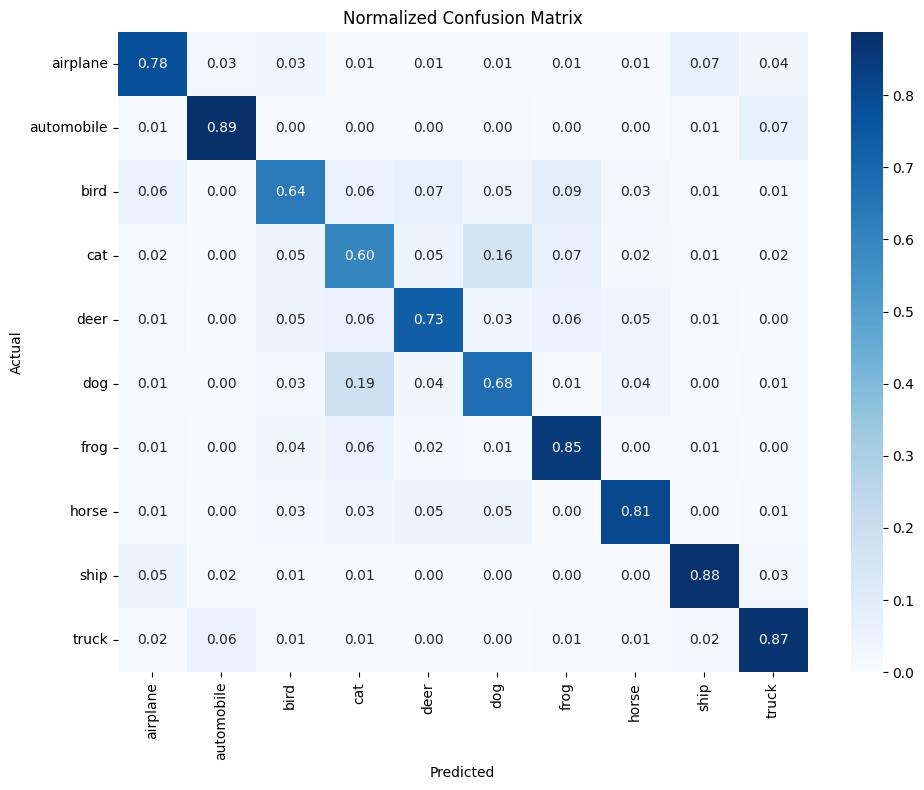


Classification Report:
               precision    recall  f1-score   support

    airplane       0.80      0.78      0.79      1000
  automobile       0.88      0.89      0.88      1000
        bird       0.73      0.64      0.68      1000
         cat       0.58      0.60      0.59      1000
        deer       0.74      0.73      0.74      1000
         dog       0.68      0.68      0.68      1000
        frog       0.77      0.85      0.81      1000
       horse       0.82      0.81      0.81      1000
        ship       0.87      0.88      0.87      1000
       truck       0.83      0.87      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



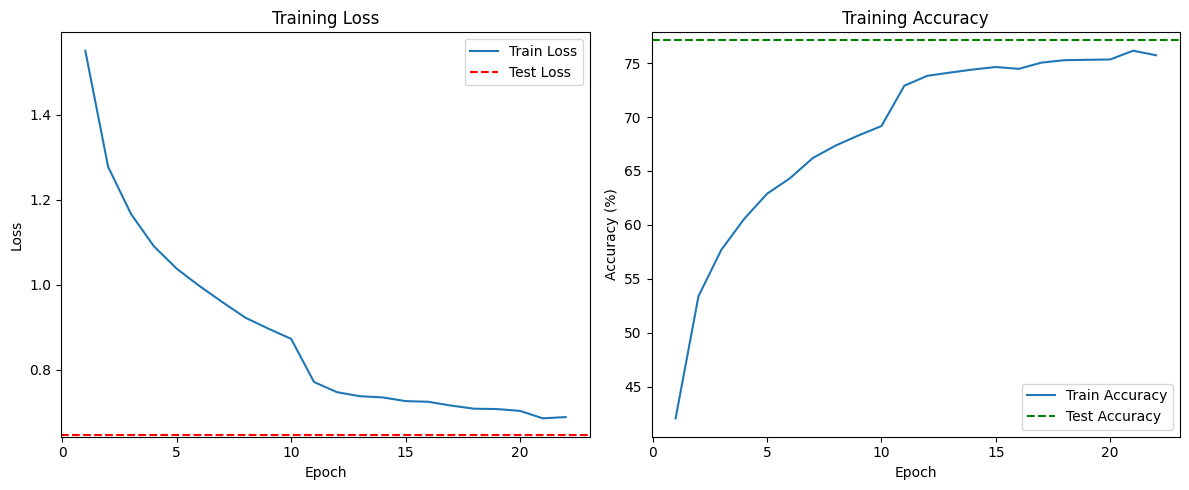

Predicted: truck - t.jpg


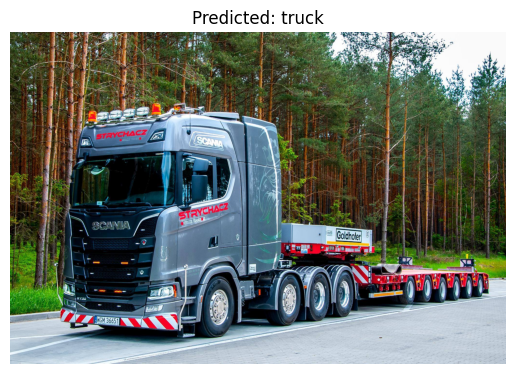

Predicted: airplane - p.jpg


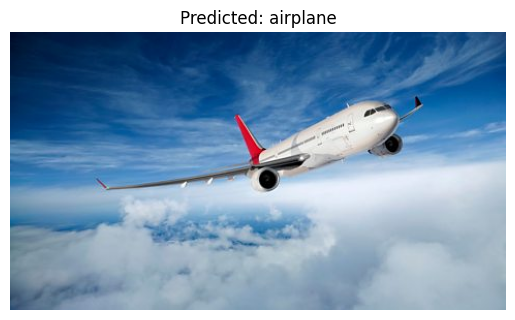

Predicted: bird - b.jpg


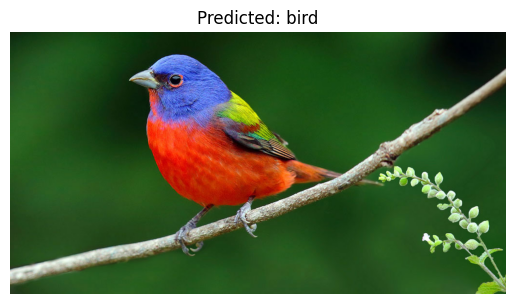

Predicted: frog - f.jpg


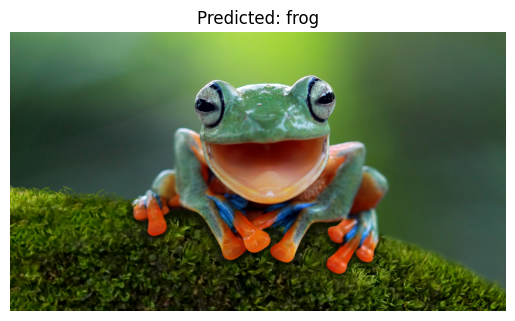

In [4]:
# --- [IMPORTS & SETUP] ---
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter
from PIL import Image
import os

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- [DATA PREP] ---
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2, pin_memory=True)
classes = trainset.classes

# --- [VISUALIZATION] ---
labels = [label for _, label in trainset]
label_counts = Counter(labels)

plt.figure(figsize=(10, 5))
plt.bar(classes, [label_counts[i] for i in range(len(classes))])
plt.title("Class Distribution (Bar Chart)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie([label_counts[i] for i in range(len(classes))], labels=classes, autopct='%1.1f%%')
plt.title("Class Distribution (Pie Chart)")
plt.tight_layout()
plt.show()

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.figure(figsize=(8, 8))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title("Sample CIFAR-10 Images")
    plt.show()

dataiter = iter(trainloader)
images, labels_batch = next(dataiter)
imshow(torchvision.utils.make_grid(images[:16]))
print("Sample labels:")
print(' '.join(classes[labels_batch[j]] for j in range(16)))

images_flat = images.view(images.size(0), -1).numpy()
labels_np = labels_batch.numpy()
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(images_flat)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels_np, cmap='tab10')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title("t-SNE Visualization of Image Features")
plt.tight_layout()
plt.show()

samples = torch.stack([trainset[i][0] for i in range(200)])
flat_pixels = samples.view(200, -1).numpy()
df = pd.DataFrame(flat_pixels)
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap of RGB Pixel Values (200 samples)")
plt.tight_layout()
plt.show()

# --- [MODEL] ---
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64, 128, 3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc1 = nn.Linear(128, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.gap(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# --- [TRAIN FUNCTION] ---
def train_model(model, trainloader, criterion, optimizer, epochs=20):
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    train_losses, train_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        scheduler.step()
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

    return train_losses, train_accuracies

# --- [EVALUATION FUNCTION] ---
def evaluate_model(model, testloader):
    model.eval()
    correct, total = 0, 0
    all_preds, all_labels = [], []
    test_loss = 0.0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = 100 * correct / total
    avg_loss = test_loss / len(testloader)
    print(f"\nTest Accuracy: {accuracy:.2f}% | Test Loss: {avg_loss:.4f}")

    conf_matrix = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix / conf_matrix.sum(axis=1, keepdims=True), annot=True, fmt='.2f',
                xticklabels=classes, yticklabels=classes, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Normalized Confusion Matrix")
    plt.tight_layout()
    plt.show()

    print("\nClassification Report:\n", classification_report(all_labels, all_preds, target_names=classes))
    return avg_loss, accuracy

# --- [TRAINING CURVES] ---
def plot_training_curves(train_losses, train_accuracies, test_loss=None, test_accuracy=None):
    epochs = len(train_losses)
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
    if test_loss:
        plt.axhline(test_loss, color='r', linestyle='--', label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy')
    if test_accuracy:
        plt.axhline(test_accuracy, color='g', linestyle='--', label='Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# --- [PREDICT] ---
def predict_images(image_paths, model, class_names, transform, device):
    for image_path in image_paths:
        if not os.path.exists(image_path):
            print(f"File not found: {image_path}")
            continue

        try:
            img = Image.open(image_path).convert('RGB')
            original_img = img.copy()
            img = img.resize((32, 32))
            img_tensor = transform(img).unsqueeze(0).to(device)

            model.eval()
            with torch.no_grad():
                output = model(img_tensor)
                _, predicted = torch.max(output, 1)
                pred_class = class_names[predicted.item()]

            print(f"Predicted: {pred_class} - {image_path}")
            plt.imshow(original_img)
            plt.title(f"Predicted: {pred_class}")
            plt.axis('off')
            plt.show()

        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

if __name__ == "__main__":
    model = Net().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_losses, train_accuracies = train_model(model, trainloader, criterion, optimizer, epochs=22)
    test_loss, test_accuracy = evaluate_model(model, testloader)
    plot_training_curves(train_losses, train_accuracies, test_loss, test_accuracy)

    image_paths = [
        "t.jpg",
        "p.jpg",
        "b.jpg",
        "f.jpg"
    ]
    predict_images(image_paths, model, classes, transform_test, device)
